Note: This was originally a take-home project. The goal is to predict the target variable "bad_flag" and flag defaulted loans, making this a binary classification task.

In [76]:
# General Imports
import pandas as pd
import numpy as np

# Utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split


# Classifiers
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier as RF, GradientBoostingClassifier as GB)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

print('Done')

Done


In [77]:
# Import the data
df = pd.read_csv('flag_task.csv')
df

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,NaN,NaN,NaN,NaN,0.0,region_5,7,...,1,0,0,0,NaN,NaN,563.089780,26.0,False,0
4153,596156,2016-08-06,2016-03-11,NaN,NaN,NaN,NaN,1.0,region_2,12,...,4,0,0,0,3.0,NaN,576.875277,38.0,False,1
4154,645359,2016-09-05,2016-04-30,NaN,NaN,NaN,NaN,1.0,region_2,12,...,4,0,0,0,4.0,NaN,554.816921,21.0,False,0
4155,730681,2016-10-14,2016-05-20,NaN,NaN,NaN,NaN,0.0,region_6,7,...,4,0,0,0,4.0,NaN,563.089780,35.0,False,0


In [78]:
# Explore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [79]:
df.describe()

,loanKey,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,bad_flag
count,4157.000000,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000,4157.000000
mean,525386.651431,1.444444,0.733333,0.280000,1.184693,12.338225,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222,0.100313
std,202001.338206,0.900599,0.764572,0.502339,1.723715,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143,0.300453
min,58567.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000,0.000000
25%,363964.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000,0.000000
50%,543603.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000,0.000000
75%,687271.000000,2.000000,1.000000,1.000000,2.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000,0.000000
max,884377.000000,7.000000,5.000000,3.000000,31.000000,80.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000,1.000000


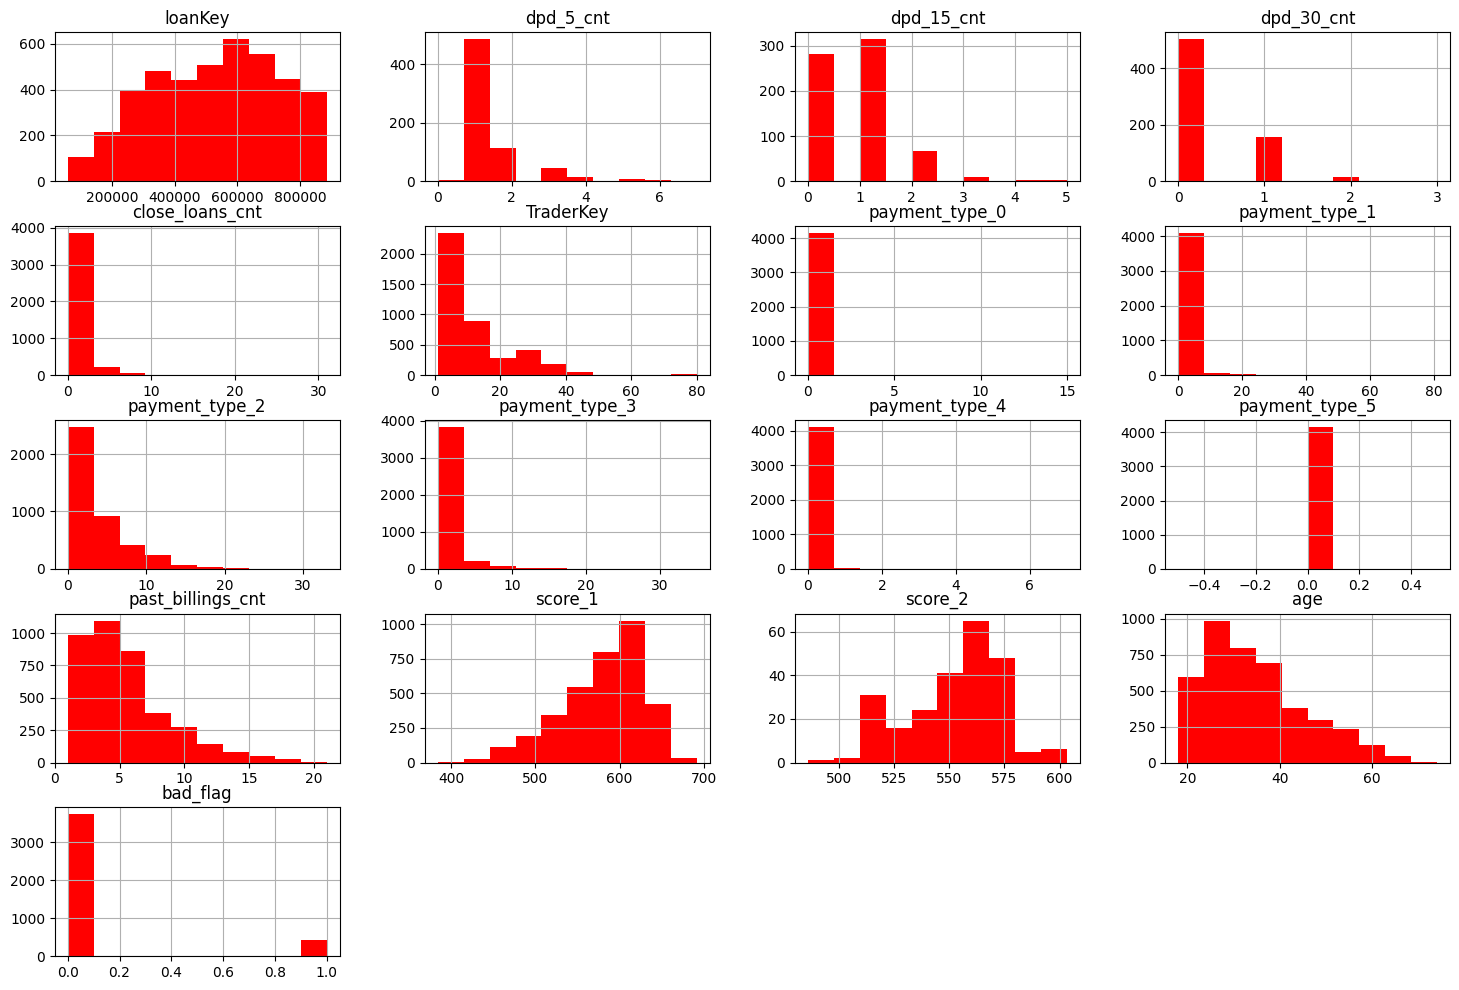

In [80]:
_ = df.hist(figsize=(18, 12), color="red")

We notice that there is a notable class imbalance for our target variable. We will address this later

In [81]:
df["bad_flag"].value_counts()

bad_flag
0    3740
1     417
Name: count, dtype: int64

Feature Engineering

In [82]:
# Convert date features to datetime
# Create new feature - difference in days between the first and the repeated loan
df[["rep_loan_date", "first_loan"]] = df[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)
df["days_between_rep_and_first_loan"] = (df["rep_loan_date"] - df["first_loan"]).dt.days

In [83]:
# Convert categorical to dummies
federal_districts = pd.get_dummies(df["federal_district_nm"], prefix="federal")
df = pd.concat(objs=[df, federal_districts], axis=1)

In [84]:
# Fill Nan values with 0 and drop federal district feature
df.fillna(value=0, inplace=True)
df = df[df.columns.drop('federal_district_nm')]

In [85]:
# Convert Bools and drop unnecessary columns
df['federal_region_0'] = df['federal_region_0']*1
df['federal_region_1'] = df['federal_region_1']*1
df['federal_region_2'] = df['federal_region_2']*1
df['federal_region_3'] = df['federal_region_3']*1
df['federal_region_4'] = df['federal_region_4']*1
df['federal_region_5'] = df['federal_region_5']*1
df['federal_region_6'] = df['federal_region_6']*1
df['federal_region_7'] = df['federal_region_7']*1
df['gender'] = df['gender']*1
df = df.drop(columns=["loanKey","first_overdue_date","rep_loan_date",'first_loan'])

df

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,...,bad_flag,days_between_rep_and_first_loan,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,0.0,0.0,0.0,3.0,6,0,0,10,0,0,...,0,328,0,0,0,0,0,0,1,0
1,1.0,0.0,0.0,0.0,6,0,0,6,0,0,...,0,180,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,2.0,6,0,0,0,5,0,...,0,314,0,1,0,0,0,0,0,0
3,0.0,0.0,0.0,1.0,14,0,0,4,0,0,...,0,365,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,22,0,3,0,0,0,...,0,120,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,0.0,0.0,0.0,0.0,7,0,0,1,0,0,...,0,25,0,0,0,0,0,1,0,0
4153,0.0,0.0,0.0,1.0,12,0,0,4,0,0,...,1,148,0,0,1,0,0,0,0,0
4154,0.0,0.0,0.0,1.0,12,0,0,4,0,0,...,0,128,0,0,1,0,0,0,0,0
4155,0.0,0.0,0.0,0.0,7,0,0,4,0,0,...,0,147,0,0,0,0,0,0,1,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   dpd_5_cnt                        4157 non-null   float64
 1   dpd_15_cnt                       4157 non-null   float64
 2   dpd_30_cnt                       4157 non-null   float64
 3   close_loans_cnt                  4157 non-null   float64
 4   TraderKey                        4157 non-null   int64  
 5   payment_type_0                   4157 non-null   int64  
 6   payment_type_1                   4157 non-null   int64  
 7   payment_type_2                   4157 non-null   int64  
 8   payment_type_3                   4157 non-null   int64  
 9   payment_type_4                   4157 non-null   int64  
 10  payment_type_5                   4157 non-null   int64  
 11  past_billings_cnt                4157 non-null   float64
 12  score_1             

In [87]:
# Return the columns so we can quickly copy and paste minus the target
df.columns

Index(['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt', 'close_loans_cnt', 'TraderKey',
       'payment_type_0', 'payment_type_1', 'payment_type_2', 'payment_type_3',
       'payment_type_4', 'payment_type_5', 'past_billings_cnt', 'score_1',
       'score_2', 'age', 'gender', 'bad_flag',
       'days_between_rep_and_first_loan', 'federal_region_0',
       'federal_region_1', 'federal_region_2', 'federal_region_3',
       'federal_region_4', 'federal_region_5', 'federal_region_6',
       'federal_region_7'],
      dtype='object')

In [88]:
x_columns = ['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt',
       'close_loans_cnt', 'TraderKey', 'payment_type_0', 'payment_type_1',
       'payment_type_2', 'payment_type_3', 'payment_type_4', 'payment_type_5',
       'past_billings_cnt', 'score_1', 'score_2', 'age', 'gender',
       'days_between_rep_and_first_loan', 'federal_region_0',
       'federal_region_1', 'federal_region_2', 'federal_region_3',
       'federal_region_4', 'federal_region_5', 'federal_region_6',
       'federal_region_7']



Finally, as the last step before we can begin modeling, we must address the class imbalance. While there are many options available, such as oversampling the minority, assigning weights, or generating new data (SMOTE), we will keep it simple by just under-sampling the majority class.

In [89]:
# Under sample Majority
pos_examples = df["bad_flag"].sum()
neg_examples = df.shape[0] - pos_examples

print("Positive examples", pos_examples, ", negative examples", neg_examples)

# Keep all positive examples
pos = df[df["bad_flag"] == 1]

# Use pandas' sample method to randomly take 25% of the majority class
neg = df[df["bad_flag"] == 0].sample(frac=0.25, random_state=22)

print("Negative examples after under-sampling", neg.shape[0])

# Concatenating the positive and sub-sampled negative examples
df = pd.concat(objs=[pos, neg])

print("Final data shape", df.shape)

Positive examples 417 , negative examples 3740
Negative examples after under-sampling 935
Final data shape (1352, 26)


In [90]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df[x_columns],df["bad_flag"], test_size=0.2, stratify=df["bad_flag"], random_state=22)

In [91]:
# Scale the inputs for the classifiers that need it
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)

x_test_scaled = scaler.fit_transform(X_test)


We begin with a logistic regression, using a hyperparameter gridsearch to find the optimal amount of regularization.

In [ ]:
Cs = 10. ** np.arange(-3, 4)
param_grid = {"penalty": ["l1","l2"], "C": Cs}

Logreg = GridSearchCV(LogisticRegression(),param_grid= param_grid)
Logreg.fit(x_train_scaled,y_train)

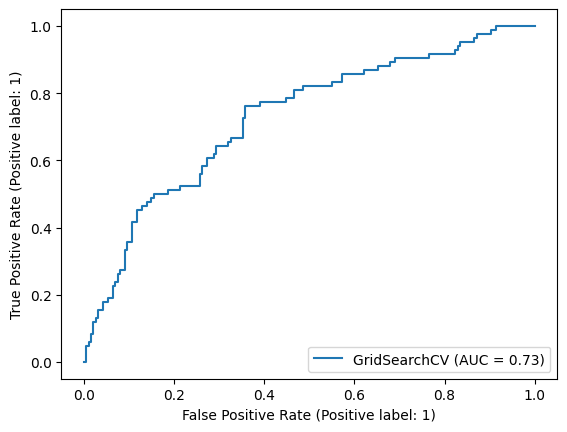

In [102]:
RocCurveDisplay.from_estimator(Logreg, x_test_scaled, y_test)

We follow the same framework for the rest for the models.

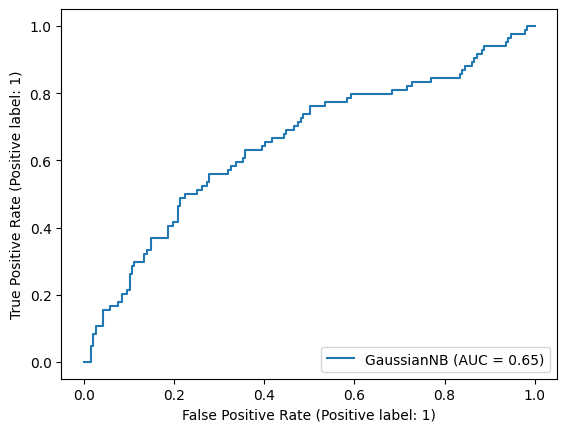

In [103]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train,y_train)
RocCurveDisplay.from_estimator(NB, X_test, y_test)

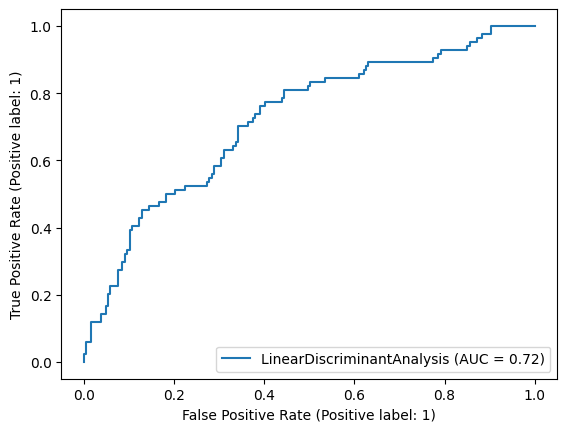

In [104]:
# Linear Discriminant Analysis
FisherLD = LDA()
FisherLD.fit(X_train,y_train)
RocCurveDisplay.from_estimator(FisherLD, X_test, y_test)

In [ ]:
# Quadratic Discriminant Analysis
QD = QDA()
QD.fit(X_train,y_train)

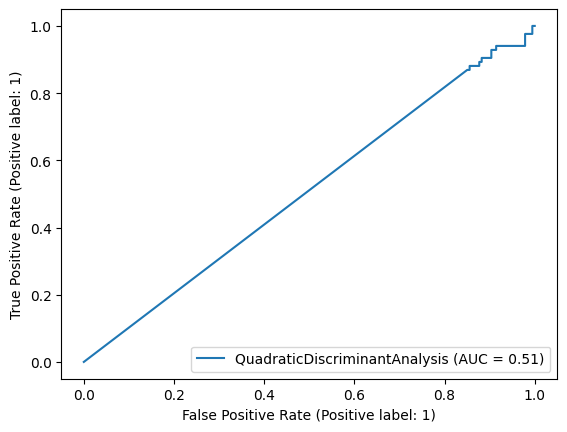

In [108]:
RocCurveDisplay.from_estimator(QD, X_test, y_test)

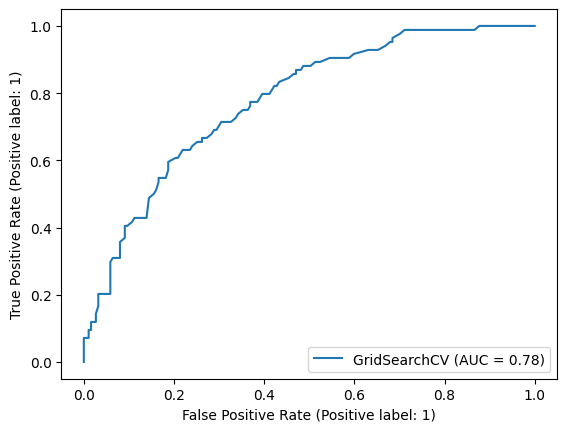

In [111]:
# Random Forest

RF_param_grid = {'n_estimators': [200,500], 'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], 'random_state': [22]} 

RandF = GridSearchCV(RF(),param_grid= RF_param_grid)

RandF.fit(X_train,y_train)

RocCurveDisplay.from_estimator(RandF, X_test, y_test)

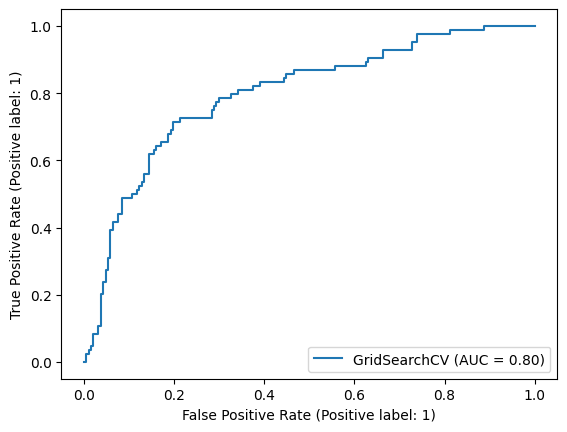

In [114]:
# Gradient Boosting

GB_param_grid = {'learning_rate': [0.1,0.01,0.001], 'n_estimators': [100, 500, 1000], 'max_depth': [3], 'random_state': [22]} 

Boost = GridSearchCV(GB(), param_grid= GB_param_grid)

Boost.fit(X_train,y_train)


RocCurveDisplay.from_estimator(Boost, X_test, y_test)

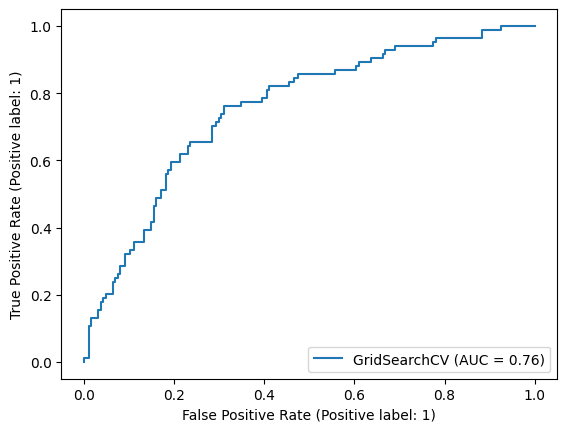

In [115]:
# Support Vector Machine, Radial Basis Function Kernel

gammas = 10. ** np.arange(-3, 3)


rbf_grid = {'C':Cs, 'gamma':gammas, 'kernel':['rbf']}


SVMachine = GridSearchCV(SVC(),param_grid= rbf_grid)

SVMachine.fit(x_train_scaled,y_train)

RocCurveDisplay.from_estimator(SVMachine, x_test_scaled, y_test)

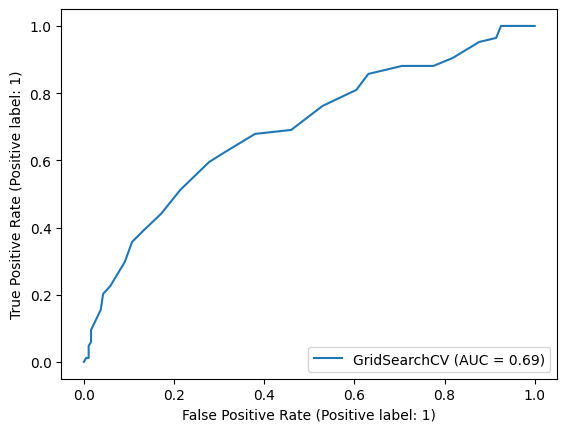

In [120]:
Neighbor_param_grid = {"n_neighbors": [1,2,3,5,10,20,50,75,100]}

KN = GridSearchCV(KNeighborsClassifier(),param_grid= Neighbor_param_grid)

KN.fit(x_train_scaled,y_train)

RocCurveDisplay.from_estimator(KN, x_test_scaled, y_test)